# 1. 개요

In [331]:
import bt

# 1. 가격 데이터의 수집
data = bt.get("SPY, TLT")
data.head()

,spy,tlt
Date,,
2016-04-25,189.760254,114.352341
2016-04-26,190.042282,113.833504
2016-04-27,190.433411,114.969589
2016-04-28,188.705063,115.443703
2016-04-29,187.686279,115.738945


In [102]:
# 앞서 저장한 데이터 불러오기
import pandas as pd

prices = pd.read_csv('data/asset_data.csv', index_col = 0)
prices.index = pd.to_datetime(prices.index)

In [103]:
# 2. 전략의 정의
# 전체 자산 동일비중, 매월 말 리밸런싱
bt_strategy = bt.Strategy("Asset_EW",
                          [bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.RunMonthly(),
                           bt.algos.Rebalance()
                          ])

In [106]:
# 3. 백테스트

# 백테스트 생성
data = prices.dropna()
bt_backtest = bt.Backtest(bt_strategy, data)

# 백테스트 실행
bt_result = bt.run(bt_backtest)

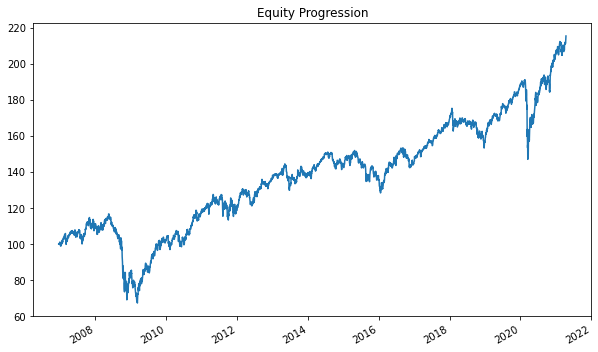

In [108]:
# 4. 결과에 대한 평가
import matplotlib.pyplot as plt
%matplotlib inline

bt_result.plot(figsize = (10, 6), legend = False)
plt.show()

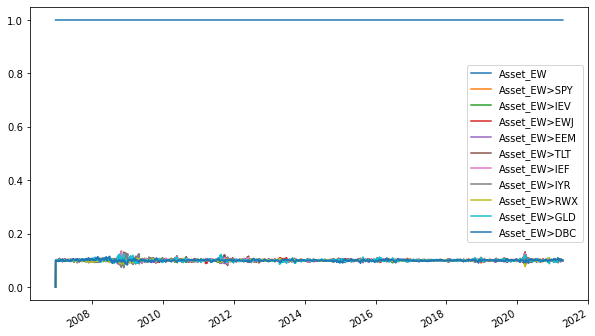

In [109]:
bt_result.plot_weights(figsize = (10, 6))

In [110]:
bt_result.get_security_weights().tail()

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
2021-04-12,0.102115,0.100785,0.099616,0.098304,0.099428,0.099601,0.100404,0.100940,0.099643,0.098897
2021-04-13,0.101777,0.100717,0.099622,0.098093,0.099546,0.099388,0.100378,0.101162,0.099721,0.099332
2021-04-14,0.101284,0.100476,0.099294,0.098448,0.099088,0.099124,0.099623,0.101784,0.099146,0.101469
2021-04-15,0.101337,0.100342,0.098756,0.098341,0.099728,0.098751,0.100359,0.101317,0.099729,0.101079
2021-04-16,0.101397,0.100979,0.098625,0.098416,0.098879,0.098433,0.100096,0.101786,0.100371,0.100757


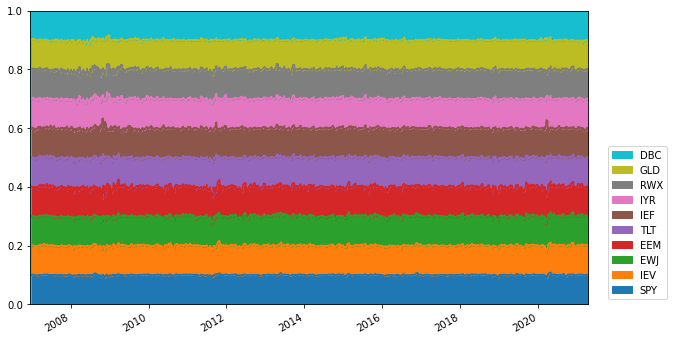

In [111]:
ax = bt_result.get_security_weights().plot.area(figsize = (10, 6), ylim = [0, 1],  legend = False)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles), reversed(labels), loc='lower right', bbox_to_anchor=(1.15, 0))
plt.show()

In [112]:
bt_result.stats.head(10)

,Asset_EW
start,2006-12-18 00:00:00
end,2021-04-16 00:00:00
rf,0
total_return,1.15357
cagr,0.0550029
max_drawdown,-0.423533
calmar,0.129867
mtd,0.0372992
three_month,0.0430328
six_month,0.12863


In [ ]:
#bt_result.prices.head()
#bt_result.prices.to_returns()

# 2. 6대 4 포트폴리오

In [ ]:
class OrderedWeights(bt.Algo):
    def __init__(self, weights):
        self.target_weights = weights

    def __call__(self, target):
        target.temp['weights'] = dict(zip(target.temp['selected'], self.target_weights))
        return True

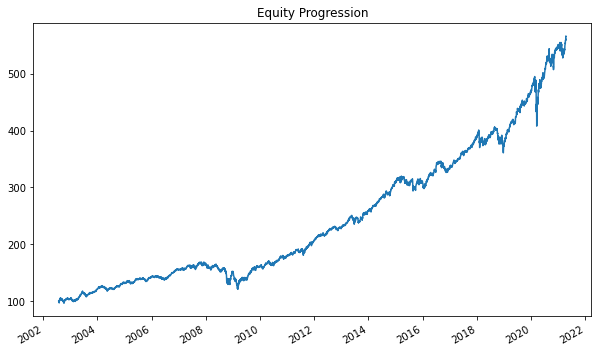

In [308]:
data = prices[['SPY', 'TLT']].dropna()

bt_6040 = bt.Strategy('6040',
                      [bt.algos.SelectAll(),
                       bt.algos.WeighSpecified(SPY = 0.6, TLT = 0.4),
                       bt.algos.RunYearly(),
                       bt.algos.Rebalance()])
bt_6040_backtest = bt.Backtest(bt_6040, data)
bt_6040_result = bt.run(bt_6040_backtest)

bt_6040_result.plot(figsize = (10, 6), legend = False)
plt.show()

In [309]:
def buy_and_hold(data, name, delay = 0):
    
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.RunAfterDays(delay),
                               bt.algos.RunOnce(),
                               bt.algos.SelectAll(),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, data)

# Create benchmark strategy backtest
Stock = buy_and_hold(data[['SPY']], name='Stock')
Bond = buy_and_hold(data[['TLT']], name='Bond')

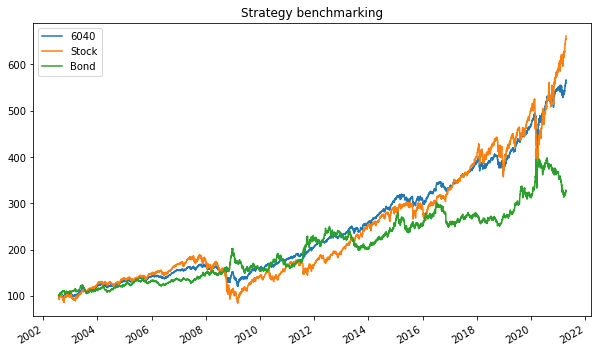

In [310]:
# Run all backtests and plot the resutls
bt_results = bt.run(bt_6040_backtest, Stock, Bond)
bt_results.plot(figsize = (10, 6), title='Strategy benchmarking')
plt.show()

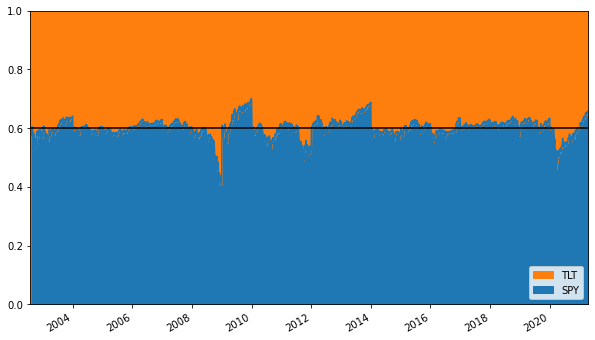

In [311]:
ax = bt_6040_result.get_security_weights().plot.area(figsize = (10, 6), ylim = [0, 1],  legend = False)
handles, labels = ax.get_legend_handles_labels()
plt.axhline(y=0.6, color='black', linestyle='-')
plt.margins(0, 0)
plt.legend(reversed(handles), reversed(labels), loc='lower right')
plt.show()

# 2.1 올웨더 포트폴리오

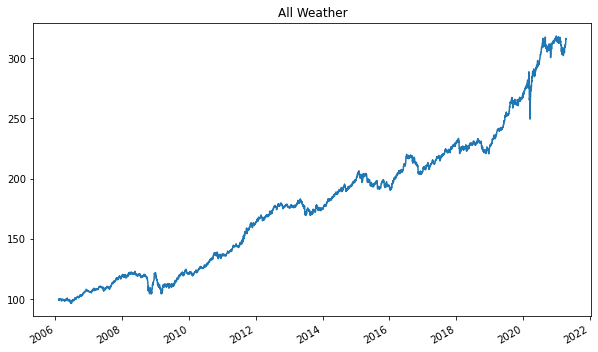

In [127]:
data = prices[['SPY', 'TLT', 'IEF', 'GLD', 'DBC']].dropna()

bt_aw = bt.Strategy('All_Weather',
                    [bt.algos.SelectAll(),
                     bt.algos.WeighSpecified(SPY = 0.3, TLT = 0.4, IEF = 0.15, GLD = 0.075, DBC = 0.075),
                     bt.algos.RunQuarterly(),
                     bt.algos.Rebalance()])
bt_aw_backtest = bt.Backtest(bt_aw, data)
bt_aw_result = bt.run(bt_aw_backtest)

bt_aw_result.plot(figsize = (10, 6), title = 'All Weather', legend = False)
plt.show()

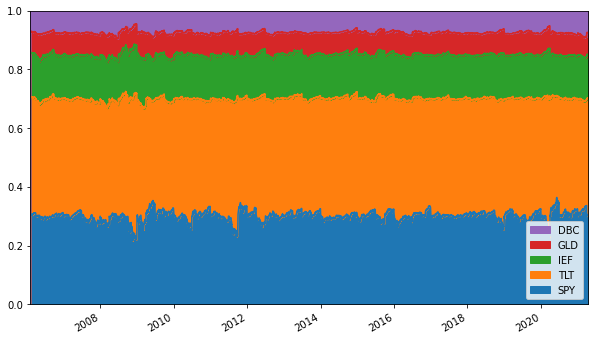

In [128]:
ax = bt_aw_result.get_security_weights().plot.area(figsize = (10, 6), ylim = [0, 1],  legend = False)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles), reversed(labels), loc='lower right')
plt.show()

# 3. 트레이딩 전략

In [326]:
# SMA
import talib

data = prices[['SPY']].dropna()
sma = talib.SMA(data['SPY'], timeperiod = 200).to_frame()
sma.columns = ['SPY']

bt_sma = bt.Strategy('Timing', 
                     [bt.algos.RunAfterDays(200),
                      bt.algos.SelectWhere(data > sma),
                      bt.algos.WeighEqually(),
                      bt.algos.Rebalance()])
bt_sma_backtest = bt.Backtest(bt_sma, data)

Stock = buy_and_hold(data, name='Stock', delay = 200)

bt_sma_result = bt.run(bt_sma_backtest, Stock)

<AxesSubplot:>

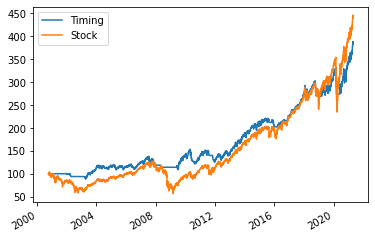

In [327]:
start = sma.notna().idxmax()[0]

bt_sma_result.prices[start:].plot()

<AxesSubplot:>

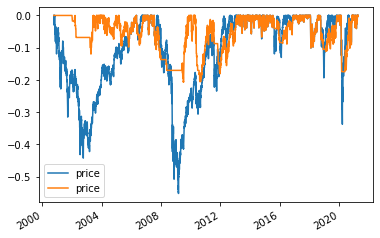

In [329]:
bt.merge(
    bt_sma_result.backtests['Stock'].stats.drawdown,
    bt_sma_result.backtests['Timing'].stats.drawdown
)[start:].plot()

In [268]:
bt_sma_result.backtests['Timing'].stats.drawdown_details.sort_values('drawdown').head(5)

,Start,End,Length,drawdown
50,2007-07-20 00:00:00,2009-11-16 00:00:00,850,-0.206761
62,2010-04-26 00:00:00,2013-02-19 00:00:00,1030,-0.204955
175,2020-02-20 00:00:00,2020-11-16 00:00:00,270,-0.174243
0,2002-01-07 00:00:00,2003-06-11 00:00:00,520,-0.119693
164,2018-09-21 00:00:00,2019-11-15 00:00:00,420,-0.111054


In [330]:
bt_sma_result.stats

,Timing,Stock
start,1999-12-30 00:00:00,1999-12-30 00:00:00
end,2021-04-16 00:00:00,2021-04-16 00:00:00
rf,0,0
total_return,2.87561,3.45028
cagr,0.0656831,0.0726249
max_drawdown,-0.206761,-0.551884
calmar,0.317677,0.131595
mtd,0.0514721,0.051472
three_month,0.112842,0.112842
six_month,0.209009,0.209009


# 동적자산배분

In [59]:
import pandas as pd
import talib
import bt

prices_gdaa = prices.copy().dropna()

bt_gdaa = bt.Strategy('Dynamic Asset Allocation', 
                      [
                       bt.algos.SelectAll(),
                       bt.algos.SelectMomentum(n = 5,lookback = pd.DateOffset(years = 1)),
                       bt.algos.RunMonthly(),
                       #bt.algos.WeighEqually(),
                       bt.algos.WeighMeanVar(lookback = pd.DateOffset(years = 1), bounds = (0.1, 0.3), covar_method="standard"),
                       bt.algos.Rebalance()
                      ])                      

bt_aw_backtest = bt.Backtest(bt_gdaa, prices_gdaa)
bt_aw_result = bt.run(bt_aw_backtest)

<AxesSubplot:title={'center':'Equity Progression'}>

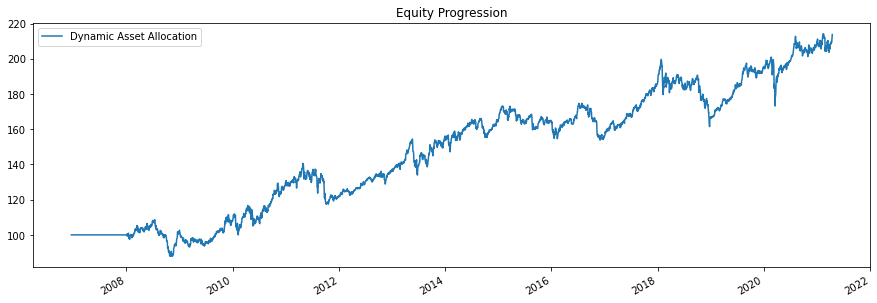

In [60]:
%matplotlib inline

bt_aw_result.plot()

NameError: name 'plt' is not defined

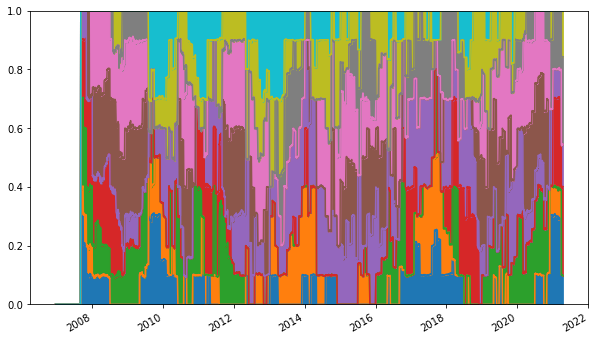

In [24]:
ax = bt_aw_result.get_security_weights().plot.area(figsize = (10, 6), ylim = [0, 1],  legend = False)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles), reversed(labels), loc='lower right')
plt.show()

In [68]:
bt_aw_result.get_security_weights()["2010"]

,DBC,GLD,EEM,TLT,IEV,IEF,IYR,EWJ,SPY,RWX
2010-01-04,0.0,0.299968,0.299998,0.0,0.099985,0.0,0.099999,0.0,0.000000,0.199992
2010-01-05,0.0,0.298406,0.300875,0.0,0.099654,0.0,0.099808,0.0,0.000000,0.201199
2010-01-06,0.0,0.301949,0.300132,0.0,0.099324,0.0,0.099311,0.0,0.000000,0.199227
2010-01-07,0.0,0.301400,0.299704,0.0,0.099438,0.0,0.100638,0.0,0.000000,0.198762
2010-01-08,0.0,0.301372,0.300561,0.0,0.099730,0.0,0.099462,0.0,0.000000,0.198818
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,0.0,0.292209,0.099317,0.0,0.000000,0.0,0.301624,0.0,0.203921,0.102778
2010-12-28,0.0,0.295117,0.098782,0.0,0.000000,0.0,0.300930,0.0,0.202938,0.102083
2010-12-29,0.0,0.294756,0.099569,0.0,0.000000,0.0,0.300836,0.0,0.202113,0.102578
2010-12-30,0.0,0.293539,0.100158,0.0,0.000000,0.0,0.301458,0.0,0.201956,0.102741


In [16]:
bt_aw_result.prices.to_csv(

In [34]:
ret_yr = bt_aw_result.prices.to_returns().resample('Y').apply(lambda x: (x+1).prod() - 1)
ret_yr.index = ret_yr.index.strftime('%Y')

In [89]:
rets = prices.pct_change().dropna()

In [92]:
z = rets["2008-12-31" : "2009-12-31"].copy()

In [93]:
z.head()

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
Date,,,,,,,,,,
2008-12-31,0.014275,0.010711,0.008421,0.013393,-0.020919,-0.011040,0.047552,0.008942,0.007218,0.041790
2009-01-02,0.030142,0.010597,0.005219,0.047657,-0.025137,-0.014311,-0.027397,0.034712,-0.003352,0.034922
2009-01-05,-0.001184,-0.009533,-0.024922,0.012997,-0.025784,-0.001751,-0.019608,-0.007138,-0.020295,0.010488
2009-01-06,0.006678,0.012191,-0.009585,0.022642,-0.010058,-0.000618,0.049577,0.027319,0.007694,0.026173
2009-01-07,-0.029956,-0.011728,-0.009677,-0.057565,0.003921,0.000206,-0.033817,-0.012946,-0.027957,-0.051011


In [96]:
cum = z.add(1).prod().add(-1)
K = cum.rank(ascending = False) <= 5
covmat = pd.DataFrame.cov(rets.loc[:, K])

In [97]:
cum

SPY    0.281554
IEV    0.302851
EWJ    0.040125
EEM    0.712172
TLT   -0.234420
IEF   -0.076245
IYR    0.367880
RWX    0.376575
GLD    0.249243
DBC    0.210423
dtype: float64

In [98]:
cum.rank(ascending = False)

SPY     5.0
IEV     4.0
EWJ     8.0
EEM     1.0
TLT    10.0
IEF     9.0
IYR     3.0
RWX     2.0
GLD     6.0
DBC     7.0
dtype: float64

In [99]:
covmat

,SPY,IEV,EEM,IYR,RWX
SPY,0.000167,0.000178,0.000213,0.000200,0.000142
IEV,0.000178,0.000242,0.000258,0.000216,0.000183
EEM,0.000213,0.000258,0.000370,0.000267,0.000212
IYR,0.000200,0.000216,0.000267,0.000392,0.000186
RWX,0.000142,0.000183,0.000212,0.000186,0.000194


In [100]:
from cvxopt import matrix
from cvxopt import solvers
import numpy as np

P = matrix(np.array(covmat), tc = 'd') # 분산-공분산 행렬
q = matrix(np.zeros(5), tc = 'd') # 0 행렬
G = matrix(np.concatenate( (np.diag(np.repeat(-1, 5)), np.diag(np.repeat(1, 5)))) , tc = 'd') # 부등식 제약조건의 좌변
h = matrix(np.concatenate( (np.repeat(-0.1, 5), np.repeat(0.3, 5))) , tc = 'd') # 부등식 제약조건의 우변
A = matrix(np.repeat(1, 5), tc = 'd').T # 등식 제약조건의 좌변
b = matrix(1, tc = 'd') # 등식 제약조건의 우변

sol = solvers.qp(P,q,G,h, A, b)
res = np.array(sol['x']).flatten().round(2)

print(res)

     pcost       dcost       gap    pres   dres
 0:  1.0956e-04 -9.9991e-01  1e+00  0e+00  2e-16
 1:  1.0956e-04 -9.9130e-03  1e-02  9e-17  3e-16
 2:  1.0950e-04 -1.2908e-05  1e-04  6e-17  6e-18
 3:  1.0561e-04  8.9741e-05  2e-05  8e-17  8e-19
 4:  9.6307e-05  9.5104e-05  1e-06  8e-17  6e-20
 5:  9.5876e-05  9.5851e-05  3e-08  1e-16  4e-20
Optimal solution found.
[0.3 0.2 0.1 0.1 0.3]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ffn
import bt

rf = 0.04
np.random.seed(1)
mus = np.random.normal(loc=0.05,scale=0.02,size=5) + rf
sigmas = (mus - rf)/0.3 + np.random.normal(loc=0.,scale=0.01,size=5)

num_years = 10
num_months_per_year = 12
num_days_per_month = 21
num_days_per_year = num_months_per_year*num_days_per_month

rdf = pd.DataFrame(
    index = pd.date_range(
        start="2008-01-02",
        periods=num_years*num_months_per_year*num_days_per_month,
        freq="B"
    ),
    columns=['foo','bar','baz','fake1','fake2']
)

for i,mu in enumerate(mus):
    sigma = sigmas[i]
    rdf.iloc[:,i] = np.random.normal(
        loc=mu/num_days_per_year,
        scale=sigma/np.sqrt(num_days_per_year),
        size=rdf.shape[0]
    )
pdf = np.cumprod(1+rdf)*100

pdf.plot()

<AxesSubplot:>

In [2]:
sma  = pdf.rolling(window=num_days_per_month*12,center=False).median().shift(1)
plt.plot(pdf.index,pdf['foo'])
plt.plot(sma.index,sma['foo'])
plt.show()

<ipython-input-2-fa2c632b9abb>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [27]:
tsmom_ew_strat = bt.Strategy(
    'tsmom_ew',
    [
        bt.algos.RunDaily(),
        bt.algos.SelectWhere(pdf > sma),
        bt.algos.WeighEqually(),
        bt.algos.LimitWeights(limit=0.2),
        bt.algos.Rebalance()
    ]
)

# (pdf > sma).tail()

In [28]:
tsmom_ew_bt = bt.Backtest(
    tsmom_ew_strat,
    pdf,
    
    initial_capital=50000000.0,
    commissions= lambda q, p: max(100, abs(q) * 0.0021),
    integer_positions=False,
    progress_bar=True
)
tsmom_ew_res = bt.run(tsmom_ew_bt)

tsmom_ew
0% [############################# ] 100% | ETA: 00:00:00

<AxesSubplot:>

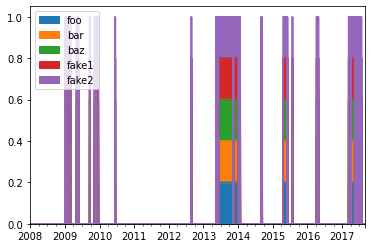

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

tsmom_ew_res.get_security_weights().plot.area()

Parent, Children

In [34]:
import bt
tickers = {
    'equity':['ITOT', 'IVV', 'IJH', 'IJR', 'IUSG', 'IUSV', 'IJK', 'IJJ', 'IJS', 'IJT', 'OEF', 'IWC'],
    'bond':['AGG', 'LQD', 'GOVT', 'MBB', 'MUB', 'TIP', 'SHY', 'IEF', 'TLT', 'HYG', 'FLOT', 'CMBS'],
}
prices = bt.data.get(tickers['equity'] + tickers['bond'], clean_tickers=False)

In [64]:
equity = bt.Strategy('t1',
 algos = [bt.algos.RunQuarterly(), 
 bt.algos.SelectAll(),
 bt.algos.SelectMomentum(n=2,lookback=pd.DateOffset(months=3)),
 bt.algos.WeighInvVol(lookback=pd.DateOffset(years=1),),
 bt.algos.Rebalance()],
 children = tickers['equity']
)

bond = bt.Strategy('t2',
 algos = [bt.algos.RunQuarterly(), 
 bt.algos.SelectAll(),
 bt.algos.SelectMomentum(n=2,lookback=pd.DateOffset(months=6)),
 bt.algos.WeighEqually(),
 bt.algos.Rebalance()],
 children = tickers['equity']
)

pooled = bt.Strategy('pooled', 
 algos = [bt.algos.RunQuarterly(),
 bt.algos.SelectAll(),
 bt.algos.WeighSpecified(t1=0.8,t2=0.2),
 bt.algos.Rebalance()], 
 children = [equity,bond]
)

backtest_pooled = bt.Backtest(pooled,prices)
report = bt.run(backtest_pooled)

<AxesSubplot:>

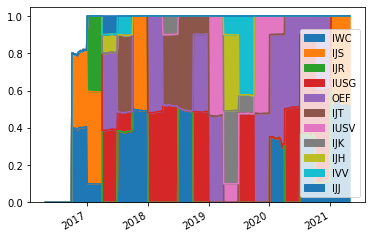

In [71]:
report.get_security_weights().plot.area()

In [72]:
data = bt.get('aapl,msft,c,gs,ge', start='2010-01-01')

# calculate moving average DataFrame using pandas' rolling_mean
import pandas as pd
# a rolling mean is a moving average, right?
sma = data.rolling(50).mean()

In [89]:
# first we create the Strategy
s = bt.Strategy('above50sma', [bt.algos.SelectWhere(data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.LimitWeights(limit=0.2),
                               bt.algos.Rebalance()])

# now we create the Backtest
t = bt.Backtest(s, data)

# and let's run it!
res = bt.run(t)

In [90]:
res.get_security_weights().to_csv('11.csv')

In [87]:
res.get_security_weights().sum(axis = 1).to_csv('1.csv')

In [155]:
prices = bt.data.get('SPY, TLT')

import talib
sma = prices.apply(lambda x: talib.SMA(x, 200))

In [156]:
mom_a = bt.Strategy('mom_a', [bt.algos.SelectWhere(prices[['spy']] > sma[['spy']]),                              
                              bt.algos.RunMonthly(),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                   children = ['spy'])

mom_b = bt.Strategy('mom_b', [bt.algos.SelectWhere(prices[['tlt']] > sma[['tlt']]),                              
                              bt.algos.RunMonthly(),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                   children = ['tlt'])

parent = bt.Strategy('parent', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),                                
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                    children = [mom_a, mom_b])

# create the backtest and run it
t = bt.Backtest(parent, prices)
r = bt.run(t)

<AxesSubplot:>

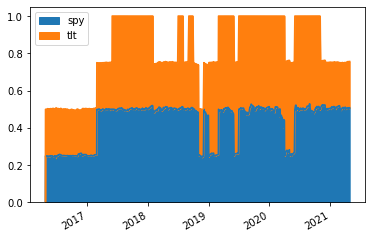

In [154]:
r.get_security_weights().plot.area()